In [2]:
import requests 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

In [3]:
url1="https://en.wikipedia.org/wiki/List_of_stock_exchanges_in_the_Americas"
r1=requests.get(url1)
soup1=bs(r1.text,'html.parser')
#print(soup1.prettify())
table1 = soup1.find('table', id="exchanges_table")
#print(table1)
Americas =pd.read_html(str(table1))
Americas=pd.DataFrame(Americas[0])
Americas.insert(0, "Continent", "America")
Americas=Americas.reindex(columns = Americas.columns.tolist()+ ['Listings','Technology'])
Americas=Americas.iloc[:,[0,1,2,3,4,5,8,6,9,7]]

#print(Americas.head())
#Americas.dtypes

In [4]:
Americas['Founded']=Americas['Founded'].str.split('/').str[0]


In [5]:
for col in Americas.columns:
  Americas[col] = Americas[col].replace(to_replace=r'\[\d+\]', value='', regex=True)

In [6]:
Americas.loc[pd.to_numeric(Americas['Founded'],errors='coerce').isna(),'Founded']=np.nan

In [7]:
Americas['Founded']=Americas['Founded'].astype(float)
#Americas.dtypes

In [8]:
url2="https://en.wikipedia.org/wiki/List_of_African_stock_exchanges"
r2=requests.get(url2)
soup2=bs(r2.text,'html.parser')
#print(soup2.prettify())
#class="wikitable sortable jquery-tablesorter"
table2 = soup2.find('table', {'class':"wikitable"})
#print(table2)
Africa =pd.read_html(str(table2))
Africa=pd.DataFrame(Africa[0])
#print(Africa.head())

Africa=Africa.reindex(columns =Africa.columns.tolist()+ ['Operating MIC'])
Africa.insert(0, "Region", "Africa")
Africa.insert(0, "Continent", "Africa")

Africa.rename(columns = {'Economy':'Country'}, inplace = True)
#Africa

In [9]:
for col in Africa.columns:
  Africa[col] = Africa[col].replace(to_replace=r'\[\d+\]', value='', regex=True)

In [10]:
Africa['Founded']=Africa['Founded'].str.split('(').str[0]

In [11]:
Africa['Founded']=Africa['Founded'].astype(float)
Africa['Listings']=Africa['Listings'].astype(float)
#print(Africa)
#Africa.dtypes


In [12]:
url3="https://en.wikipedia.org/wiki/List_of_European_stock_exchanges"
r3=requests.get(url3)
soup3=bs(r3.text,'html.parser')
#print(soup3.prettify())
#id="exchanges_table" class="wikitable sortable jquery-tablesorter"
table3 = soup3.find('table',id="exchanges_table" )
#print(table3)
Europe =pd.read_html(str(table3))
Europe=pd.DataFrame(Europe[0])

Europe=Europe.reindex(columns = Europe.columns.tolist()+ ['Link'])
Europe=Europe.iloc[:,[0,1,2,3,4,7,5,6]]
Europe.insert(0, "Region", "Europe")
Europe.insert(0, "Continent", "Europe")
Europe.rename(columns = {'Stock exchange':'Exchange','City':'Location','OperatingMIC':'Operating MIC'}, inplace = True)
#Europe

In [13]:
Europe['Founded']=Europe['Founded'].str.split('(').str[0]

In [14]:
Europe['Founded']=Europe['Founded'].astype(float)
Europe['Listings']=Europe['Listings'].astype(float)
#Europe.dtypes

In [15]:
Europe

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link,Technology,Operating MIC
0,Europe,Europe,Pan-European,Euronext,"Brussels, Paris, Dublin, Amsterdam, Lisbon, Os...",1602.0,1300.0,NaN,OPTIQ,NaN
1,Europe,Europe,Pan-European,Nasdaq Nordic,"Copenhagen, Stockholm, Helsinki, Reykjavík, Ta...",1620.0,NaN,NaN,Genium,NaN
2,Europe,Europe,Albania,Tirana Stock Exchange,Tirana,1996.0,4.0,NaN,NaN,XTIR
3,Europe,Europe,Armenia,Armenia Securities Exchange,Yerevan,2001.0,NaN,NaN,NaN,AMX
4,Europe,Europe,Austria,Wiener Börse,Vienna,1771.0,63.0,NaN,NaN,XWBO
5,Europe,Europe,Azerbaijan,Baku Stock Exchange,Baku,2000.0,27.0,NaN,NaN,BSE
6,Europe,Europe,Belarus,Belarusian Currency and Stock Exchange,Minsk,1998.0,NaN,NaN,NaN,BCSE
7,Europe,Europe,Bosnia and Herzegovina,Sarajevo Stock Exchange,Sarajevo,2001.0,NaN,NaN,NaN,XSSE
8,Europe,Europe,Bosnia and Herzegovina,Banja Luka Stock Exchange,Banja Luka,2001.0,NaN,NaN,NaN,XBLB
9,Europe,Europe,Bulgaria,Bulgarian Stock Exchange,Sofia,1914.0,NaN,NaN,NaN,XBUL


In [16]:
url4="https://en.wikipedia.org/wiki/List_of_stock_exchanges_in_Oceania"
r4=requests.get(url4)
soup4=bs(r4.text,'html.parser')
#print(soup3.prettify())

#class="wikitable"
table4 = soup4.find('table' ,{'class':"wikitable" })
#print(table4)
Oceania =pd.read_html(str(table4))
Oceania=pd.DataFrame(Oceania[0])

Oceania=Oceania.reindex(columns = Oceania.columns.tolist()+ ['Listings'])
Oceania=Oceania.iloc[:,[0,1,2,3,7,4,5,6]]
Oceania.insert(0, "Region", "Oceania")
Oceania.insert(0, "Continent", "Australia")
Oceania.rename(columns = {'Economy':'Country'}, inplace = True)
#Oceania

In [17]:
Oceania['Founded']=Oceania['Founded'].astype(float)
#Oceania.dtypes

In [18]:
Oceania

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link,Technology,Operating MIC
0,Australia,Oceania,Australia,APTEX,Sydney,2008.0,NaN,NaN,NaN,NaN
1,Australia,Oceania,Australia,Sydney Stock Exchange (formerly Asia Pacific S...,Melbourne,1997.0,NaN,NaN,Nasdaq X-stream[2],APXL
2,Australia,Oceania,Australia,Australian Securities Exchange,Sydney,1987.0,NaN,ASX,Nasdaq Genium INET[3],XASX
3,Australia,Oceania,Australia,Chi-X Australia,Melbourne,2008.0,NaN,CXA,NaN,CHIA
4,Australia,Oceania,Australia,National Stock Exchange of Australia,Sydney,1937.0,NaN,NSX,Nasdaq X-stream[4],XNEC
5,Australia,Oceania,Fiji,South Pacific Stock Exchange,Suva,1971.0,NaN,SPX,NaN,XSPS
6,Australia,Oceania,New Zealand,New Zealand Exchange,Wellington,2002.0,NaN,NZX,Nasdaq X-stream [5],XNZE
7,Australia,Oceania,Papua New Guinea,PNGX Markets Limited[6],Port Moresby,1999.0,NaN,PNGX,Nasdaq Matching Engine[7],XPOM


In [19]:
url5="https://en.wikipedia.org/wiki/List_of_Asian_stock_exchanges"
r5=requests.get(url5)
soup5=bs(r5.text,'html.parser')
#print(soup3.prettify())

#class="wikitable sortable jquery-tablesorter"
table5 = soup5.find_all('table' ,{'class':"wikitable" })
#print(table4)
Asia =pd.read_html(str(table5))

Central_Asia=pd.DataFrame(Asia[0])
Central_Asia.insert(0, "Region", "Central_Asia")
Central_Asia.rename(columns = {'Economy':'Country'}, inplace = True)

Eastern_Asia=pd.DataFrame(Asia[1])
Eastern_Asia.insert(0, "Region", "Eastern_Asia")
Eastern_Asia=Eastern_Asia.reindex(columns =Eastern_Asia.columns.tolist()+ ['Technology','Operating MIC'])
Eastern_Asia.rename(columns = {'Economy':'Country'}, inplace = True)
Eastern_Asia['Listings']=Eastern_Asia['Listings'].str.split('(').str[0]
Eastern_Asia['Listings']=Eastern_Asia['Listings'].str.replace(',','')
Eastern_Asia['Listings']=Eastern_Asia['Listings'].str.extract(r'(\d+)')[0]

Northern_Asia=pd.DataFrame(Asia[2])
Northern_Asia.insert(0, "Region", "Northern_Asia")
Northern_Asia.rename(columns = {'Economy':'Country'}, inplace = True)


Southeast_Asia=pd.DataFrame(Asia[3])
Southeast_Asia.insert(0, "Region", "Southeast_Asia")
Southeast_Asia=Southeast_Asia.reindex(columns =Southeast_Asia.columns.tolist()+ ['Technology','Operating MIC'])
Southeast_Asia.rename(columns = {'Economy':'Country'}, inplace = True)
Southeast_Asia['Listings']=Southeast_Asia['Listings'].str.split('(').str[0]


Southern_Asia=pd.DataFrame(Asia[4])
Southern_Asia.insert(0, "Region", "Southern_Asia")
Southern_Asia=Southern_Asia.reindex(columns =Southern_Asia.columns.tolist()+ ['Operating MIC'])
Southern_Asia=Southern_Asia.iloc[:,[0,1,2,3,4,5,6,7,9]]      
Southern_Asia.rename(columns = {'Economy':'Country'}, inplace = True)
Southern_Asia['Listings']=Southern_Asia['Listings'].replace(to_replace=r'\[\d+\]', value='', regex=True)
Southern_Asia['Listings']=Southern_Asia['Listings'].str.split('(').str[0]


Western_Asia=pd.DataFrame(Asia[5])
Western_Asia.insert(0, "Region", "Western_Asia")
Western_Asia.rename(columns = {'Economy':'Country'}, inplace = True)


Asian=Central_Asia.append([Eastern_Asia,Northern_Asia,Southeast_Asia,Southern_Asia,Western_Asia],ignore_index=True)
Asian.insert(0, "Continent", "Asia")
#print(Asian.head())

C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\3106721102.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Asian=Central_Asia.append([Eastern_Asia,Northern_Asia,Southeast_Asia,Southern_Asia,Western_Asia],ignore_index=True)


In [20]:
Asian.loc[Asian['Country']=='Russia','Founded']=2011
#Asian

In [21]:
Asian.loc[Asian['Listings']=='1300+','Listings']=1300

In [22]:
Asian['Founded']=Asian['Founded'].astype(float)
Asian['Listings']=Asian['Listings'].astype(float)

In [23]:
result = Americas.append([Africa,Europe,Oceania,Asian],ignore_index=True)

print(result.dtypes)
result

Continent         object
Region            object
Country           object
Exchange          object
Location          object
Founded          float64
Listings         float64
Link              object
Technology        object
Operating MIC     object
dtype: object


C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\1293462297.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = Americas.append([Africa,Europe,Oceania,Asian],ignore_index=True)


,Continent,Region,Country,Exchange,Location,Founded,Listings,Link,Technology,Operating MIC
0,America,North America,Canada,Canadian Securities Exchange,Toronto,2004.0,NaN,CSE,NaN,XCNQ
1,America,North America,Canada,Montreal Exchange,Montreal,1872.0,NaN,MX,NaN,NaN
2,America,North America,Canada,NASDAQ Canada,New York City,2000.0,NaN,Nasdaq Canada,NaN,NaN
3,America,North America,Canada,Toronto Stock Exchange,Toronto,1861.0,NaN,TSX,NaN,NaN
4,America,North America,Canada,TSX Venture Exchange,Calgary,2001.0,NaN,TSX,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
270,Asia,Western_Asia,Syria,Damascus Securities Exchange,Damascus,2009.0,24.0,DSE,NaN,NaN
271,Asia,Western_Asia,United Arab Emirates,Abu Dhabi Securities Market,Abu Dhabi,2000.0,73.0,ADSM,NaN,NaN
272,Asia,Western_Asia,United Arab Emirates,Dubai Financial Market,Dubai,2000.0,178.0,DFM,Nasdaq Matching Engine[24],NaN
273,Asia,Western_Asia,United Arab Emirates,NASDAQ Dubai,Dubai,2005.0,NaN,NASDAQ Dubai,NaN,NaN


In [24]:
for col in result.columns:
  result[col] = result[col].replace(to_replace=r'\[\d+\]', value='', regex=True)

In [25]:
result['Exchange'] = result['Exchange'].str.replace('*','',regex=True)

In [26]:
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ö','o',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ã','a',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('á','a',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ă','a',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('é','e',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('í','i',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ó','o',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ü','u',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ş','s',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ñ','n',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ú','u',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('è','e',regex=True)
for loc in ['Exchange','Location']:
  result[loc]=result[loc].str.replace('ç','c',regex=True)

In [27]:
result['Link']=result['Link'].str.replace(r'\(.*\)', '')
result['Exchange']=result['Exchange'].str.replace(r'\(.*\)', '')
result['Location']=result['Location'].str.replace(r'\(.*\)', '')

C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\4290251096.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Link']=result['Link'].str.replace(r'\(.*\)', '')
C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\4290251096.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Exchange']=result['Exchange'].str.replace(r'\(.*\)', '')
C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\4290251096.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Location']=result['Location'].str.replace(r'\(.*\)', '')


In [28]:
result.loc[result['Country']=='Bolivia','Link']='BVB'
result.loc[result['Country']=='Curacao','Link']='DCSX'
result.loc[result['Country']=='Haiti','Link']='HSE'

In [29]:
result['Location']=result['Location'].str.split(',').str[0]


In [30]:
result['Operating MIC']=result['Operating MIC'].str.split('/').str[0]

In [31]:
result

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link,Technology,Operating MIC
0,America,North America,Canada,Canadian Securities Exchange,Toronto,2004.0,NaN,CSE,NaN,XCNQ
1,America,North America,Canada,Montreal Exchange,Montreal,1872.0,NaN,MX,NaN,NaN
2,America,North America,Canada,NASDAQ Canada,New York City,2000.0,NaN,Nasdaq Canada,NaN,NaN
3,America,North America,Canada,Toronto Stock Exchange,Toronto,1861.0,NaN,TSX,NaN,NaN
4,America,North America,Canada,TSX Venture Exchange,Calgary,2001.0,NaN,TSX,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
270,Asia,Western_Asia,Syria,Damascus Securities Exchange,Damascus,2009.0,24.0,DSE,NaN,NaN
271,Asia,Western_Asia,United Arab Emirates,Abu Dhabi Securities Market,Abu Dhabi,2000.0,73.0,ADSM,NaN,NaN
272,Asia,Western_Asia,United Arab Emirates,Dubai Financial Market,Dubai,2000.0,178.0,DFM,Nasdaq Matching Engine,NaN
273,Asia,Western_Asia,United Arab Emirates,NASDAQ Dubai,Dubai,2005.0,NaN,NASDAQ Dubai,NaN,NaN


In [32]:
result.dtypes

Continent         object
Region            object
Country           object
Exchange          object
Location          object
Founded          float64
Listings         float64
Link              object
Technology        object
Operating MIC     object
dtype: object

In [33]:
missing_percent=result.isnull().sum()/len(result)
result=result[missing_percent[missing_percent<0.7].index.tolist()]

In [34]:
result

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link
0,America,North America,Canada,Canadian Securities Exchange,Toronto,2004.0,NaN,CSE
1,America,North America,Canada,Montreal Exchange,Montreal,1872.0,NaN,MX
2,America,North America,Canada,NASDAQ Canada,New York City,2000.0,NaN,Nasdaq Canada
3,America,North America,Canada,Toronto Stock Exchange,Toronto,1861.0,NaN,TSX
4,America,North America,Canada,TSX Venture Exchange,Calgary,2001.0,NaN,TSX
...,...,...,...,...,...,...,...,...
270,Asia,Western_Asia,Syria,Damascus Securities Exchange,Damascus,2009.0,24.0,DSE
271,Asia,Western_Asia,United Arab Emirates,Abu Dhabi Securities Market,Abu Dhabi,2000.0,73.0,ADSM
272,Asia,Western_Asia,United Arab Emirates,Dubai Financial Market,Dubai,2000.0,178.0,DFM
273,Asia,Western_Asia,United Arab Emirates,NASDAQ Dubai,Dubai,2005.0,NaN,NASDAQ Dubai


In [35]:
result['Listings'].fillna(0,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\1062166853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Listings'].fillna(0,inplace=True)


In [36]:
result

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link
0,America,North America,Canada,Canadian Securities Exchange,Toronto,2004.0,0.0,CSE
1,America,North America,Canada,Montreal Exchange,Montreal,1872.0,0.0,MX
2,America,North America,Canada,NASDAQ Canada,New York City,2000.0,0.0,Nasdaq Canada
3,America,North America,Canada,Toronto Stock Exchange,Toronto,1861.0,0.0,TSX
4,America,North America,Canada,TSX Venture Exchange,Calgary,2001.0,0.0,TSX
...,...,...,...,...,...,...,...,...
270,Asia,Western_Asia,Syria,Damascus Securities Exchange,Damascus,2009.0,24.0,DSE
271,Asia,Western_Asia,United Arab Emirates,Abu Dhabi Securities Market,Abu Dhabi,2000.0,73.0,ADSM
272,Asia,Western_Asia,United Arab Emirates,Dubai Financial Market,Dubai,2000.0,178.0,DFM
273,Asia,Western_Asia,United Arab Emirates,NASDAQ Dubai,Dubai,2005.0,0.0,NASDAQ Dubai


In [37]:
result['Founded'].fillna(method='pad',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\3323499594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Founded'].fillna(method='pad',inplace=True)


In [38]:
result.iloc[[56,57,58,59,60,64,65,66,67,68,69,70,71]]

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link
56,America,South America,Venezuela,Bolsa de Valores de Caracas,Caracas,1947.0,0.0,BVC
57,America,Caribbean,Anguilla,NaN,ECSE,1947.0,0.0,NaN
58,America,Caribbean,Antigua and Barbuda,NaN,ECSE,1947.0,0.0,NaN
59,America,Caribbean,Bahamas,Bahamas Securities Exchange,Nassau,1999.0,0.0,BISX
60,America,Caribbean,Barbados,Barbados Stock Exchange,Bridgetown,1987.0,0.0,BSE
64,America,Caribbean,Dominica,NaN,ECSE,2010.0,0.0,NaN
65,America,Caribbean,Dominican Republic,Latin American International Financial Exchange,Guayacanes,2010.0,0.0,LAIFEX
66,America,Caribbean,Dominican Republic,Bolsa de Valores de la Republica Dominicana,Santo Domingo,1991.0,0.0,BVRD
67,America,Caribbean,Grenada,NaN,ECSE,1991.0,0.0,NaN
68,America,Caribbean,Haiti,Haitian Stock Exchange,NaN,2007.0,0.0,HSE


In [39]:
result.dtypes

Continent     object
Region        object
Country       object
Exchange      object
Location      object
Founded      float64
Listings     float64
Link          object
dtype: object

In [40]:
result

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link
0,America,North America,Canada,Canadian Securities Exchange,Toronto,2004.0,0.0,CSE
1,America,North America,Canada,Montreal Exchange,Montreal,1872.0,0.0,MX
2,America,North America,Canada,NASDAQ Canada,New York City,2000.0,0.0,Nasdaq Canada
3,America,North America,Canada,Toronto Stock Exchange,Toronto,1861.0,0.0,TSX
4,America,North America,Canada,TSX Venture Exchange,Calgary,2001.0,0.0,TSX
...,...,...,...,...,...,...,...,...
270,Asia,Western_Asia,Syria,Damascus Securities Exchange,Damascus,2009.0,24.0,DSE
271,Asia,Western_Asia,United Arab Emirates,Abu Dhabi Securities Market,Abu Dhabi,2000.0,73.0,ADSM
272,Asia,Western_Asia,United Arab Emirates,Dubai Financial Market,Dubai,2000.0,178.0,DFM
273,Asia,Western_Asia,United Arab Emirates,NASDAQ Dubai,Dubai,2005.0,0.0,NASDAQ Dubai


In [41]:
result.isnull().sum()

Continent     0
Region        0
Country       0
Exchange      7
Location      3
Founded       0
Listings      0
Link         72
dtype: int64

In [42]:
result.fillna('Nan',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\2683120114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.fillna('Nan',inplace=True)


In [45]:
result[result['Exchange'].str.contains("-")]

,Continent,Region,Country,Exchange,Location,Founded,Listings,Link


In [46]:
result['Exchange']=result['Exchange'].str.split('-').str[0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_4912\3243939757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Exchange']=result['Exchange'].str.split('-').str[0]


In [47]:
result.to_csv("stocks_new.csv")

In [342]:
import matplotlib.pyplot as plt


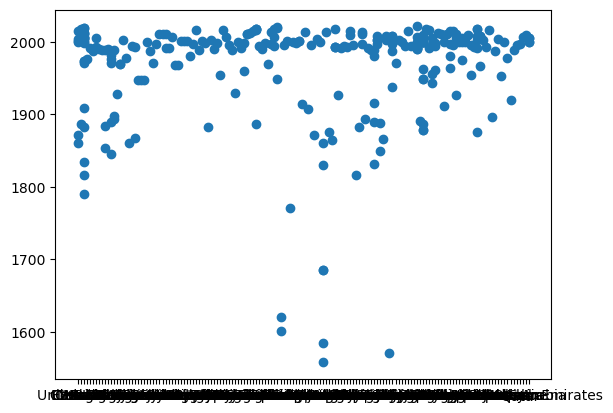

In [343]:
x=np.array(result.Country)
y=np.array(result.Founded)
plt.scatter(x,y)
plt.show()